In [2]:
#Importing required libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
#Loading Heart Disease data to the variable "data" using pandas library
data = pd.read_csv("heart_2020_cleaned.csv")

In [4]:
#Printing our data shape
data.shape

(319795, 18)

319795: data samples

18: data columns (we have 17 features and 1 target we want to predict)

In [5]:
#printing first 5 rows in our data
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [6]:
#Extract column names
data.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [7]:
#Print informations about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

It shows each column with it's Non-null values and it's type

<AxesSubplot:ylabel='None'>

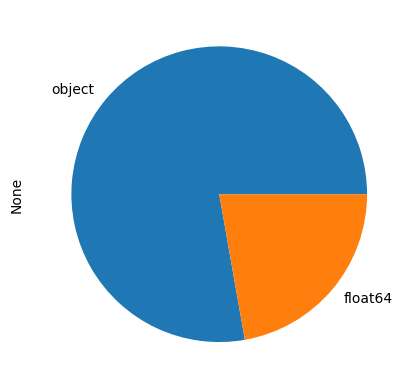

In [8]:
data.dtypes.value_counts().plot.pie()

In [9]:
data["HeartDisease"]

0          No
1          No
2          No
3          No
4          No
         ... 
319790    Yes
319791     No
319792     No
319793     No
319794     No
Name: HeartDisease, Length: 319795, dtype: object

In [10]:
data["HeartDisease"].value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

That was for taking a look on column names, and types, and exploring missing values.

Now let's move to descriptive statistics.

Descriptive Statistics

In [11]:
#Data description; mean, max, min, std (ecart type)
data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


It calculates basic statistics for all continuous variables(columns) 

Correlation

The correlation formula measures the strength and direction of the linear relationship between two variables.

In [12]:
correlation = data.corr()

In [13]:
correlation

,BMI,PhysicalHealth,MentalHealth,SleepTime
BMI,1.000000,0.109788,0.064131,-0.051822
PhysicalHealth,0.109788,1.000000,0.287987,-0.061387
MentalHealth,0.064131,0.287987,1.000000,-0.119717
SleepTime,-0.051822,-0.061387,-0.119717,1.000000


<AxesSubplot:>

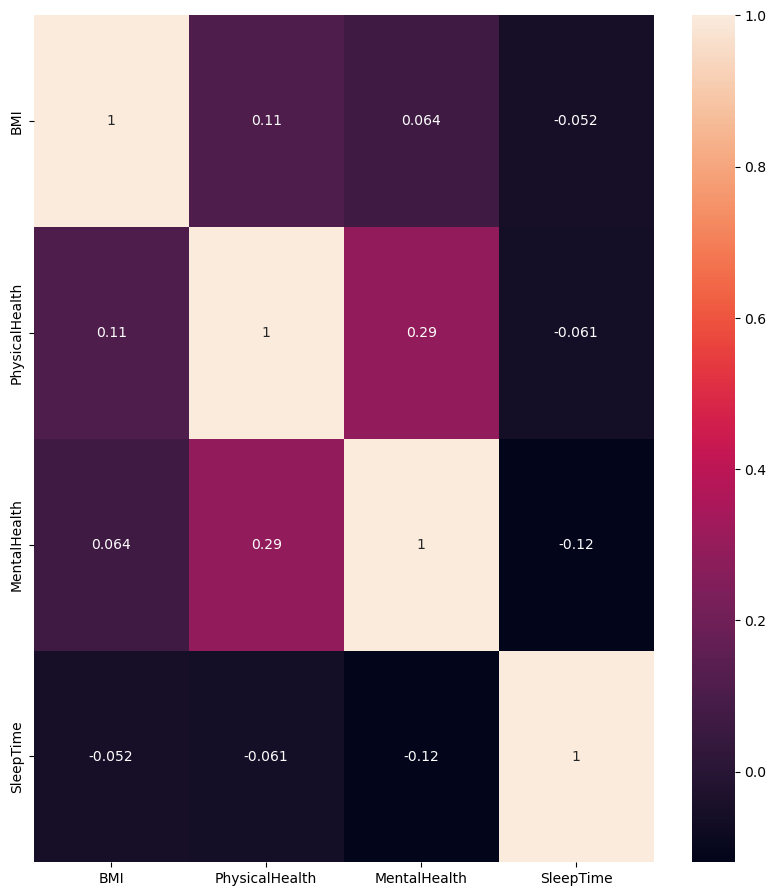

In [14]:
plt.figure(figsize=(10,11))
sns.heatmap(correlation,annot=True)

In [15]:
categorical_data=[]
numerical_data=[]
for i,c in enumerate(data.dtypes):
    if c=='object':
        categorical_data.append(data.iloc[:,i])
    else:
        numerical_data.append(data.iloc[:,i])

Lst[ Initial : End : IndexJump ] : slicing in list 

data.iloc[1:3, 0:3] : it will return subset of a dataframe (lines:1 to 3; columns from 0 to 3 )

In [16]:
categorical_data=pd.DataFrame(categorical_data).transpose()
numerical_data=pd.DataFrame(numerical_data).transpose()

In [17]:
categorical_data.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,No,Yes,No,No,No,Female,55-59,White,Yes,Yes,Very good,Yes,No,Yes
1,No,No,No,Yes,No,Female,80 or older,White,No,Yes,Very good,No,No,No
2,No,Yes,No,No,No,Male,65-69,White,Yes,Yes,Fair,Yes,No,No
3,No,No,No,No,No,Female,75-79,White,No,No,Good,No,No,Yes
4,No,No,No,No,Yes,Female,40-44,White,No,Yes,Very good,No,No,No


In [18]:
numerical_data.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime
0,16.60,3.0,30.0,5.0
1,20.34,0.0,0.0,7.0
2,26.58,20.0,30.0,8.0
3,24.21,0.0,0.0,6.0
4,23.71,28.0,0.0,8.0


Categorical Data

Extract class for each feature

In [19]:
for col in data.select_dtypes('object'):
    print(col,data[col].unique())

HeartDisease ['No' 'Yes']
Smoking ['Yes' 'No']
AlcoholDrinking ['No' 'Yes']
Stroke ['No' 'Yes']
DiffWalking ['No' 'Yes']
Sex ['Female' 'Male']
AgeCategory ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
Race ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
Diabetic ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
PhysicalActivity ['Yes' 'No']
GenHealth ['Very good' 'Fair' 'Good' 'Poor' 'Excellent']
Asthma ['Yes' 'No']
KidneyDisease ['No' 'Yes']
SkinCancer ['Yes' 'No']


In [20]:
categorical_data.nunique()

HeartDisease         2
Smoking              2
AlcoholDrinking      2
Stroke               2
DiffWalking          2
Sex                  2
AgeCategory         13
Race                 6
Diabetic             4
PhysicalActivity     2
GenHealth            5
Asthma               2
KidneyDisease        2
SkinCancer           2
dtype: int64

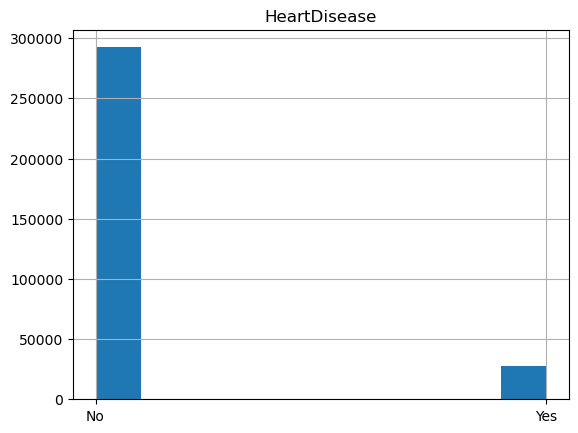

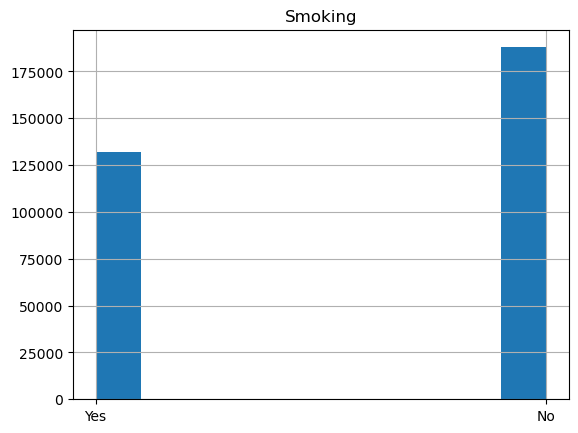

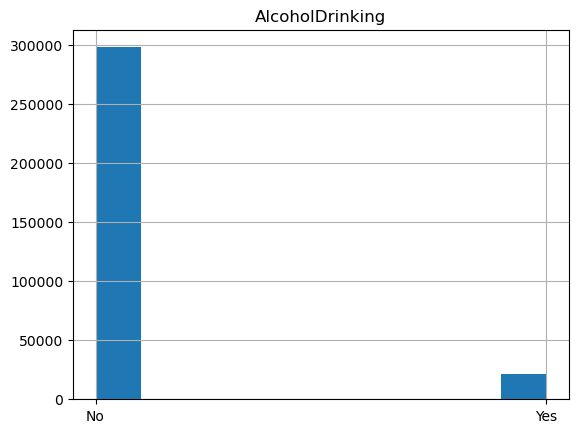

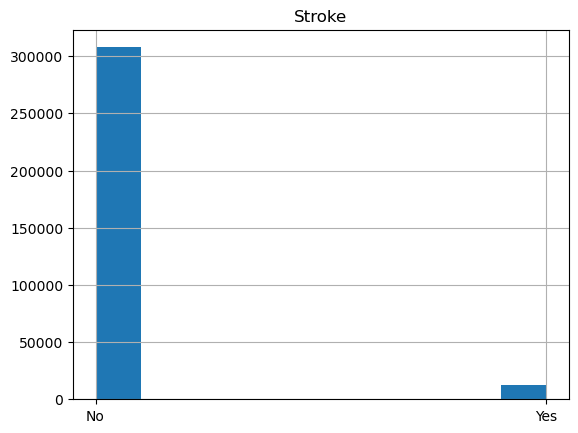

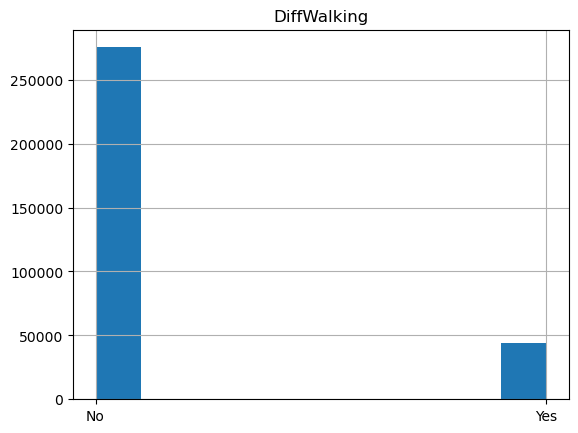

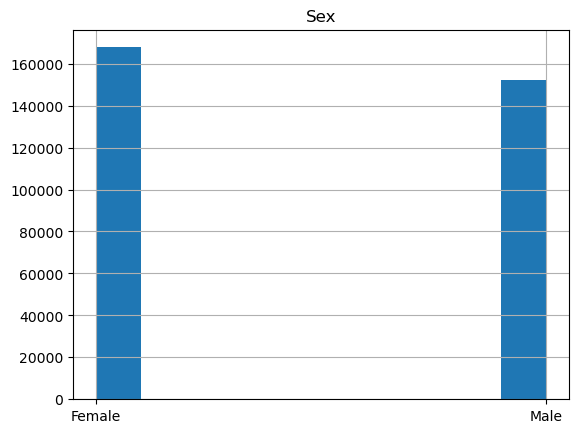

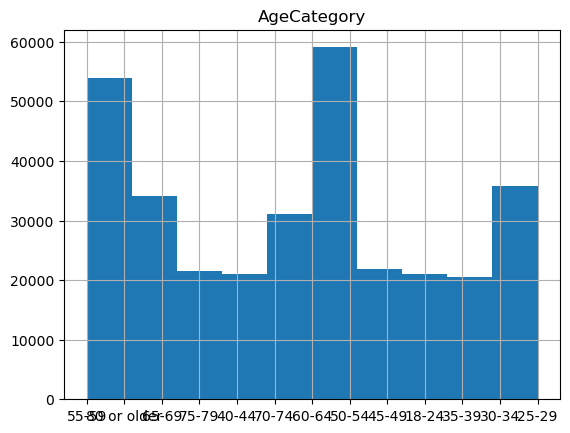

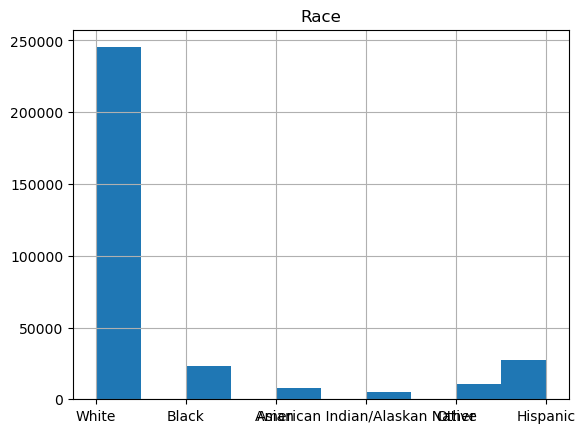

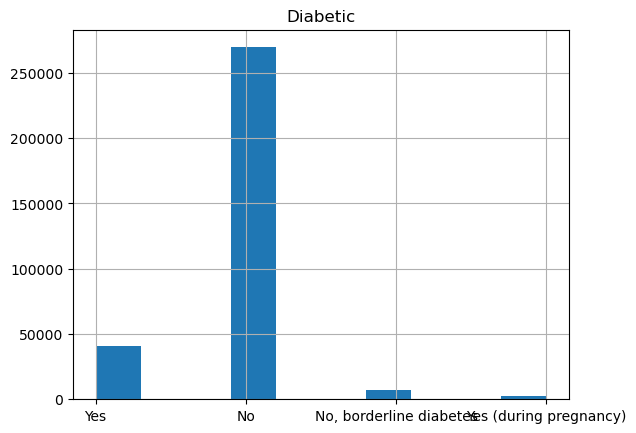

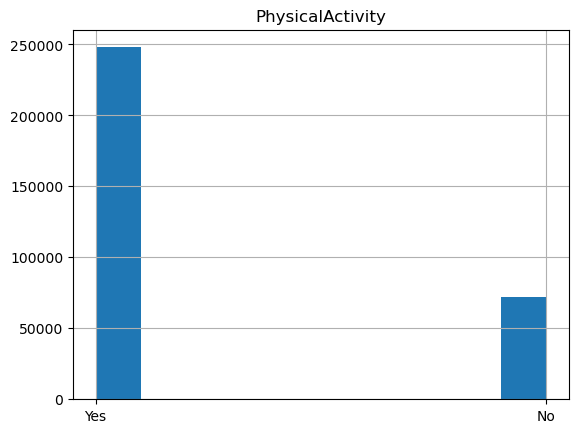

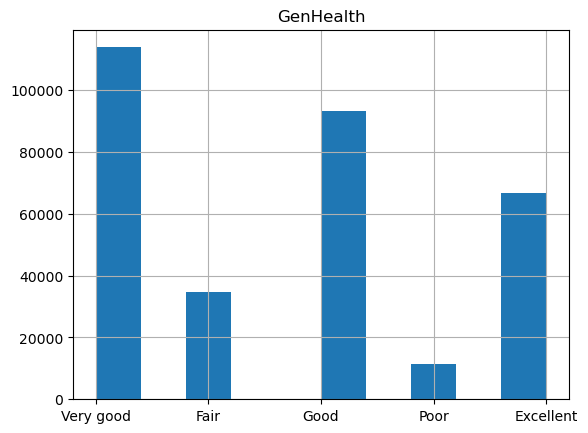

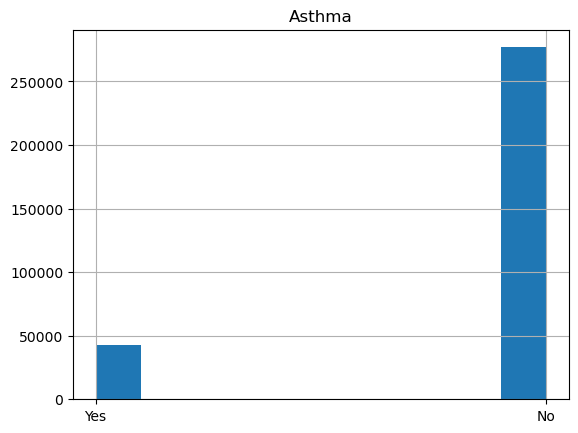

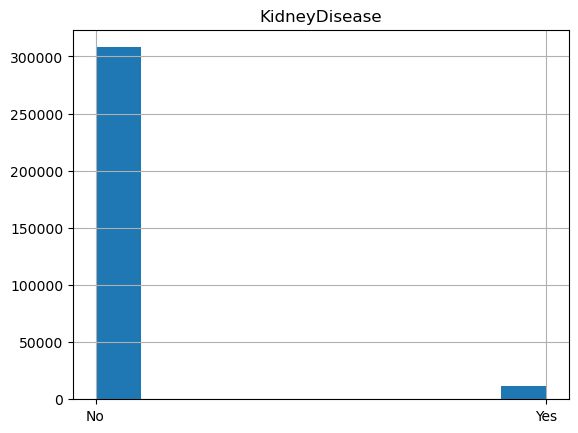

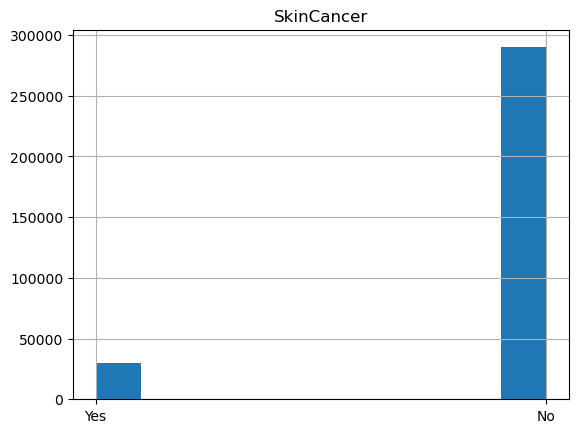

In [21]:
for col in categorical_data:
    categorical_data[col].hist()
    plt.title(col)
    plt.show()

In [22]:
for col in numerical_data:
    fig = plt.figure(figsize = (13,6))
    sns.countplot(x = numerical_data[col], hue = data['HeartDisease'], data = numerical_data, palette = 'YlOrBr')
    fig.suptitle("Distribution of Cases with Yes/No hartdisease according to AgeCategory")
    plt.xlabel(col)
    plt.legend(['Normal','HeartDisease'])
    plt.ylabel('Frequency')
    plt.show()

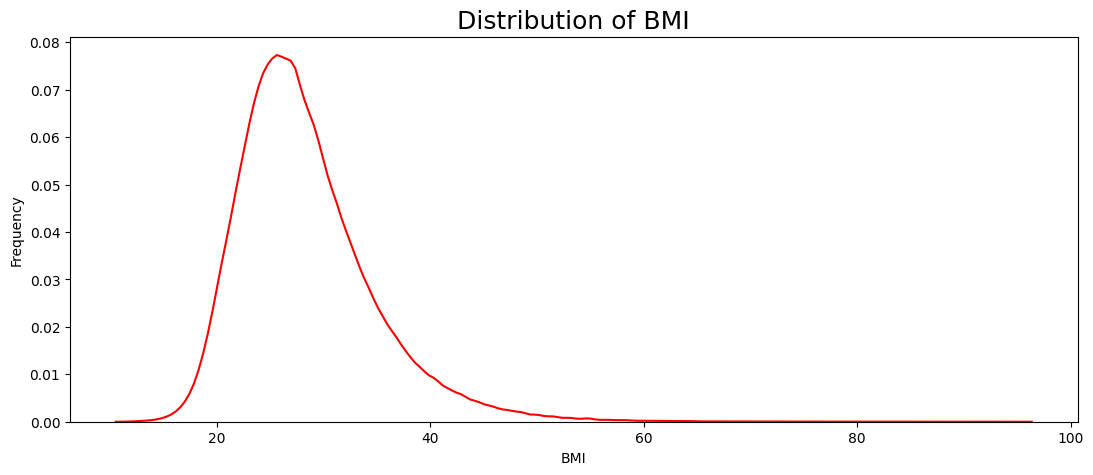

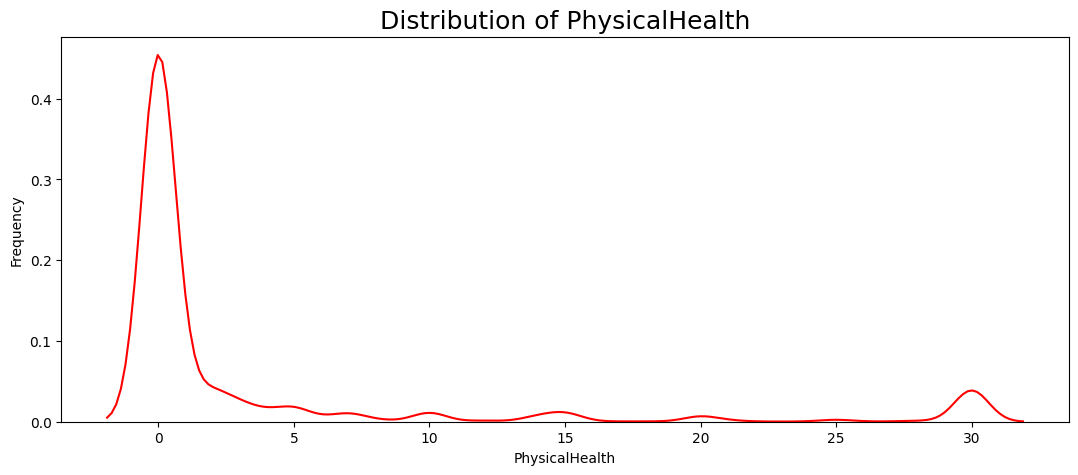

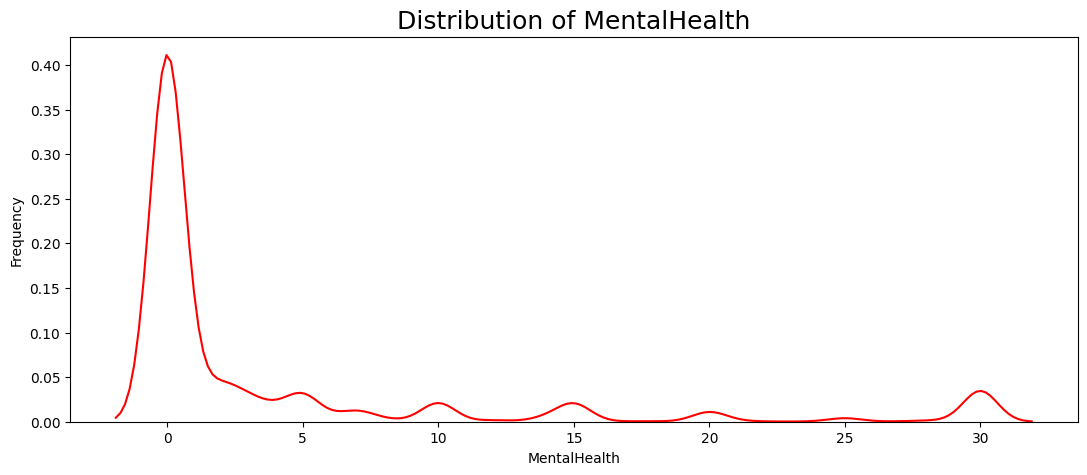

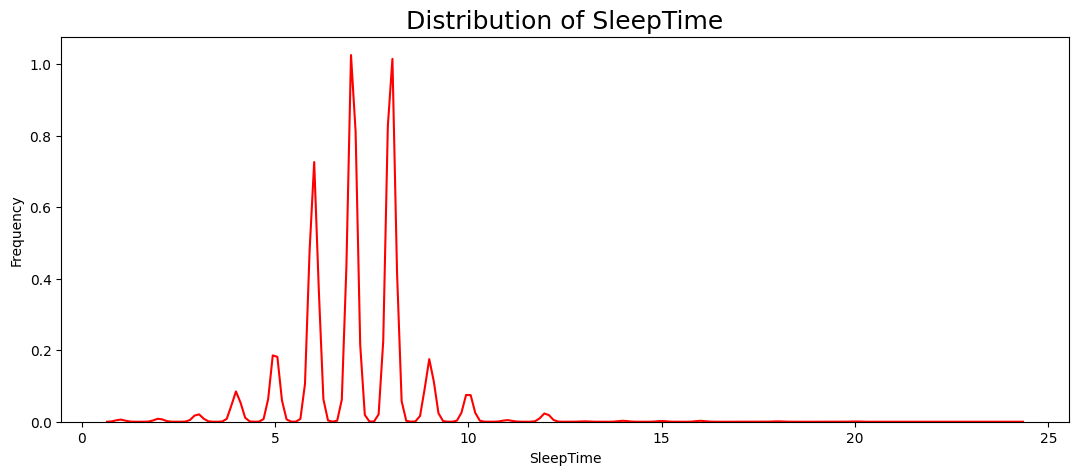

In [ ]:
for col in numerical_data:
    fig, ax = plt.subplots(figsize = (13,5))
    sns.kdeplot(numerical_data[col], color="red", label="HeartDisease", ax = ax)
    plt.title('Distribution of '+col, fontsize = 18)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    plt.show()

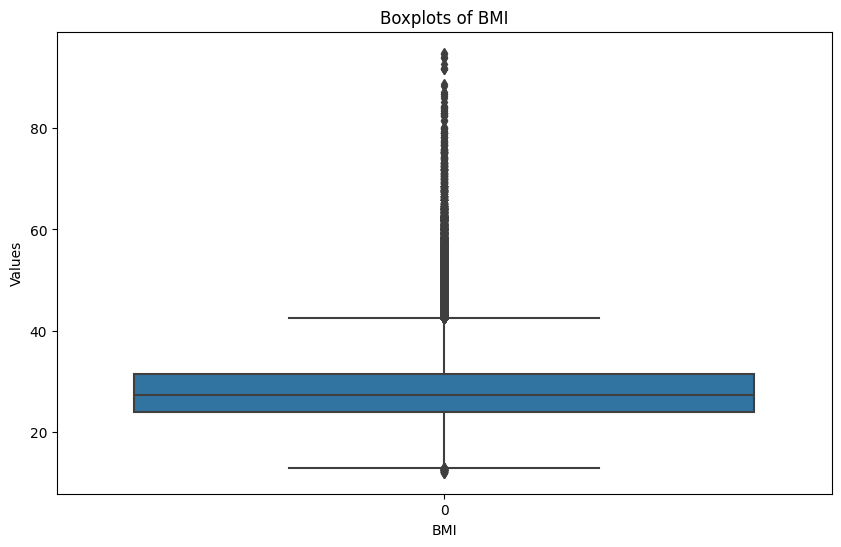

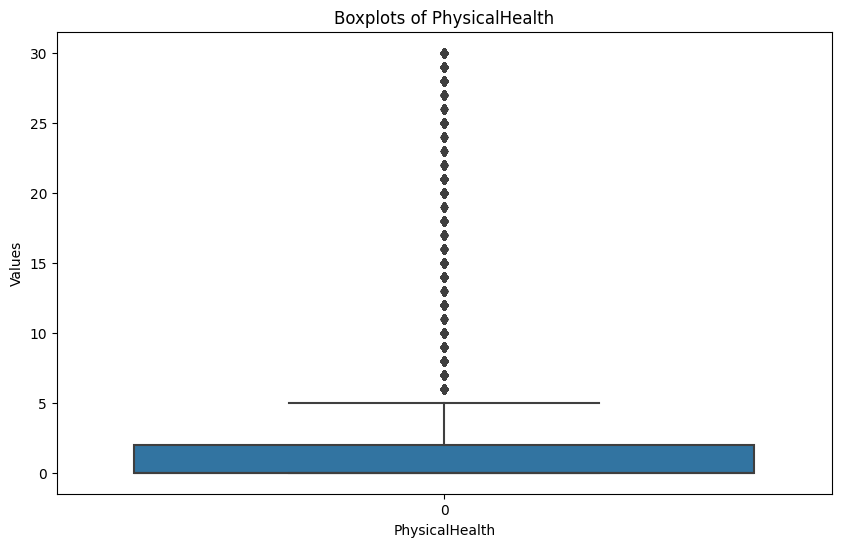

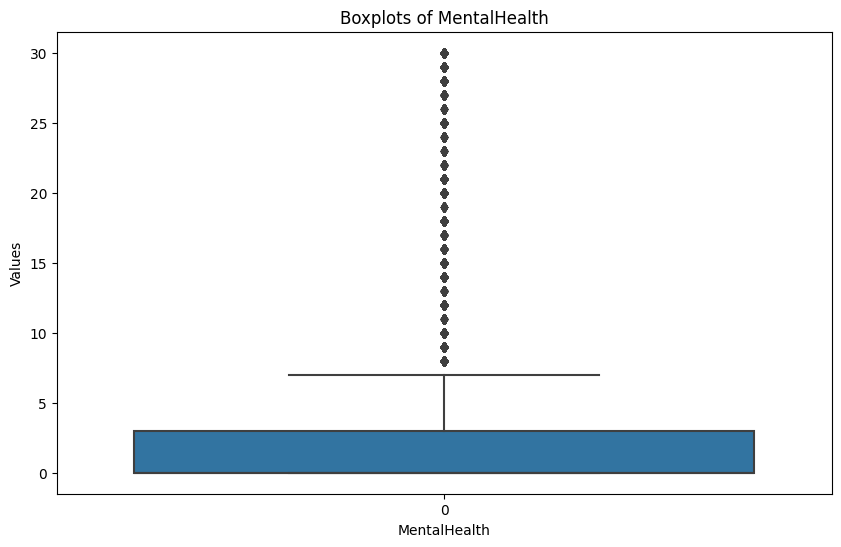

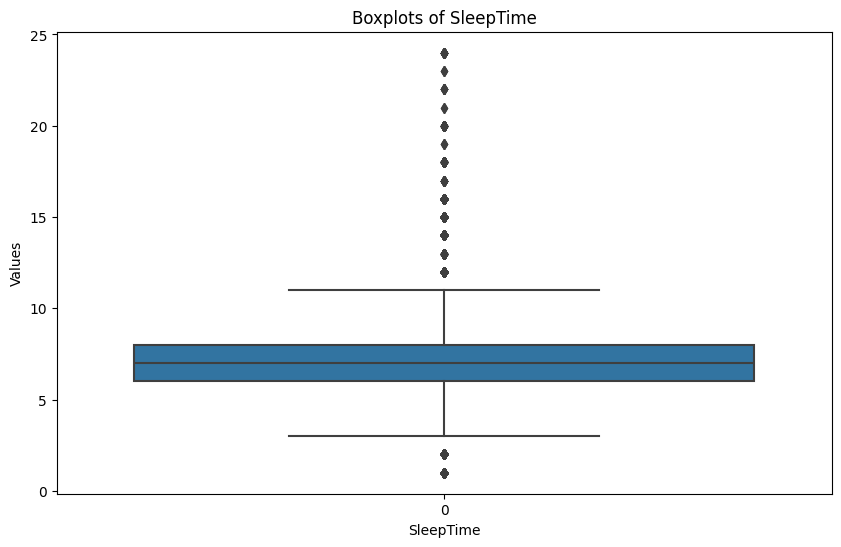

In [ ]:
for col in numerical_data:
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.boxplot(data=data[col], ax=ax)
    ax.set_title('Boxplots of '+col)
    ax.set_xlabel(col)
    ax.set_ylabel('Values')